In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 10.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
name = "TCS.NS"
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2021-07-01",end="2022-04-20")

In [4]:
highest_swing = -1
lowest_swing = -1
for i in range(1,df.shape[0]-1):
  if df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and (highest_swing == -1 or df['High'][i] > df['High'][highest_swing]):
    highest_swing = i
if df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and (lowest_swing == -1 or df['Low'][i] < df['Low'][lowest_swing]):
    lowest_swing = i

In [20]:
ratios = [0,0.236, 0.382, 0.5 ,0.618, 0.786,1]
# ratios = [1,0.786, 0.618,0.5,0.382,0.236,0]
colors = ["black","r","g","b","cyan",'y',"magenta"]
levels = []
max_level = df['High'][highest_swing]
min_level = df['Low'][lowest_swing]
for ratio in ratios:
  if highest_swing > lowest_swing: # Uptrend
    levels.append(max_level - (max_level-min_level)*ratio)
  else: # Downtrend
    levels.append(min_level + (max_level-min_level)*ratio)

In [21]:
levels

[4035.9081153714897,
 3895.0731770969433,
 3807.946477994893,
 3737.52900885762,
 3667.1115397203466,
 3566.8561599316863,
 3439.14990234375]

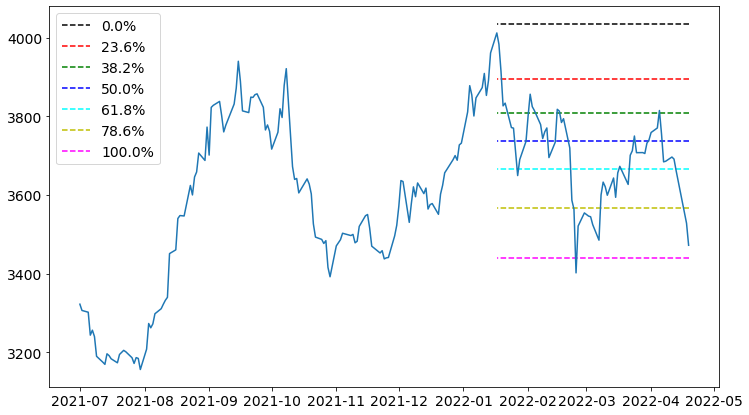

In [22]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
plt.plot(df['Close'])
start_date = df.index[min(highest_swing,lowest_swing)]
end_date = df.index[max(highest_swing,lowest_swing)]
for i in range(len(levels)):
  plt.hlines(levels[i],start_date, end_date,label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="dashed")
plt.legend()
plt.show()